3.1 answers:
 Sucrose concentration (g/L)  Average reaction rate (g/L.min)  Theoretical reaction rate (g/L.min)
                           0                            0.000                                0.000
                          10                            0.066                                0.080
                          15                            0.089                                0.100
                          25                            0.110                                0.125
                          35                            0.125                                0.140
                          45                            0.129                                0.150
                          55                            0.133                                0.157
                          70                            0.136                                0.165
                         100                            0.136                                0.1

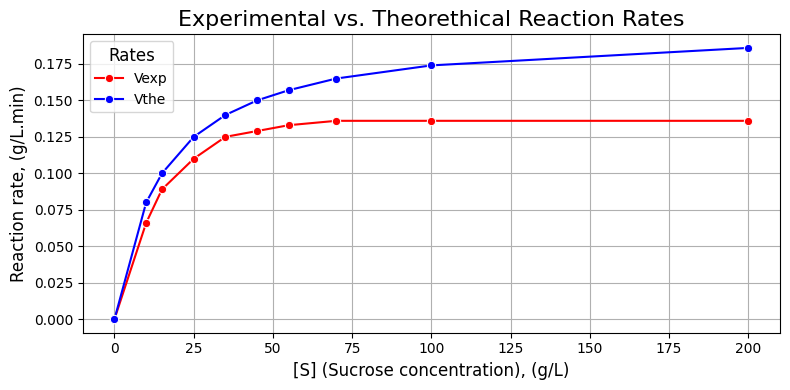

Reaction parameters were set in a way that experimental rates have never reached the theoretical.
Especially in the higher concentrations of sucrose (70-200 g/L) as the reaction rate was no longer responding to the higher concentrations of sucrose.

3.3 answers:
The SSE is: 0.00657

3.4 answers:
Optimized Vmax: 0.153
Optimized Km: 10.41
The optimized SSE is: 0.00028


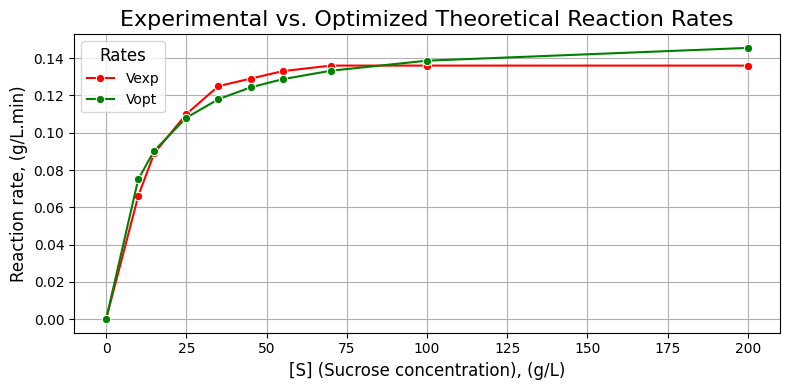

Optimized parameters describe the reaction better, because the lines in the plot are more close and SSE is considerably smaller (~20x reduction).

3.5 answers:
 Sucrose concentration (g/L)  Average reaction rate (g/L.min)    1/Vexp      1/S
                           0                            0.000       inf      inf
                          10                            0.066 15.151515 0.100000
                          15                            0.089 11.235955 0.066667
                          25                            0.110  9.090909 0.040000
                          35                            0.125  8.000000 0.028571
                          45                            0.129  7.751938 0.022222
                          55                            0.133  7.518797 0.018182
                          70                            0.136  7.352941 0.014286
                         100                            0.136  7.352941 0.010000
                         200  

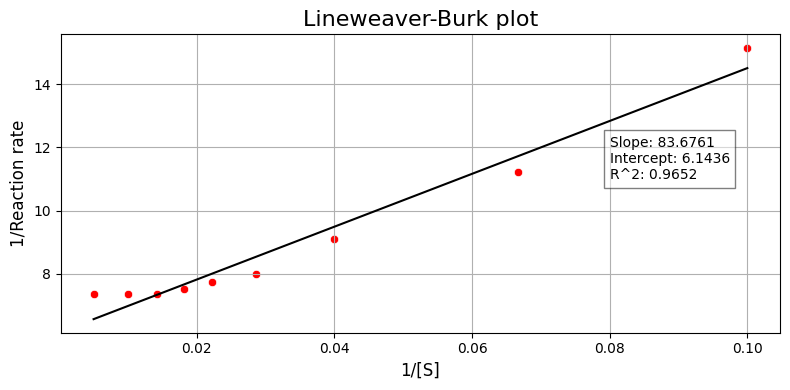


3.7 answers:


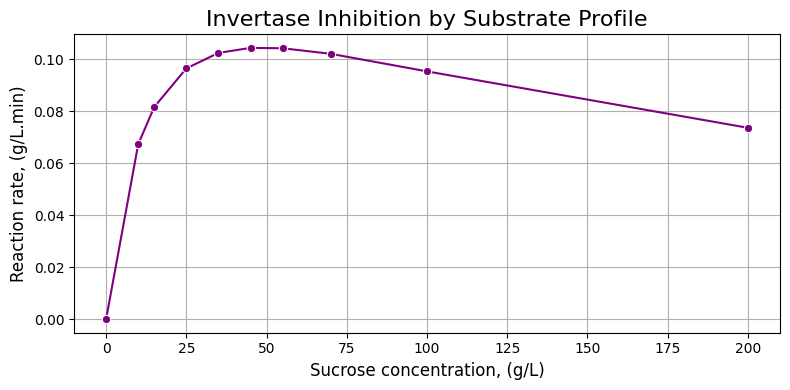

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression


#get provided data in pandas df
data = {
    'Sucrose concentration (g/L)': [0, 10, 15, 25, 35, 45, 55, 70, 100, 200],
    'Average reaction rate (g/L.min)': [0.000, 0.066, 0.089, 0.110, 0.125, 0.129, 0.133, 0.136, 0.136, 0.136]
}

df = pd.DataFrame(data)

#3.1
Vmax = 0.2
Km = 15

df.loc[:, "Theoretical reaction rate (g/L.min)"] = round(Vmax * df["Sucrose concentration (g/L)"] / (Km + df["Sucrose concentration (g/L)"]), 3)

print("3.1 answers:")
print(df.to_string(index=False))

#3.2
plt.figure(figsize=(8, 4))
sns.lineplot(x='Sucrose concentration (g/L)', y='Average reaction rate (g/L.min)', data=df, marker='o', label='Vexp', color='red')
sns.lineplot(x='Sucrose concentration (g/L)', y='Theoretical reaction rate (g/L.min)', data=df, marker='o', label='Vthe', color='blue')


plt.title("Experimental vs. Theorethical Reaction Rates", fontsize=16)
plt.xlabel("[S] (Sucrose concentration), (g/L)", fontsize=12)
plt.ylabel("Reaction rate, (g/L.min)", fontsize=12)
plt.legend(title="Rates", fontsize=10, title_fontsize='12', loc='upper left')
plt.grid(True)
plt.tight_layout()

print("\n3.2 answers:")
plt.show()
print("Reaction parameters were set in a way that experimental rates have never reached the theoretical.")
print("Especially in the higher concentrations of sucrose (70-200 g/L) as the reaction rate was no longer responding to the higher concentrations of sucrose.")

#3.3
df.loc[:, "Squared Error"] = (df["Average reaction rate (g/L.min)"] - df["Theoretical reaction rate (g/L.min)"]) ** 2

print("\n3.3 answers:")
print("The SSE is:", round(df["Squared Error"].sum(), 5))

#3.4
sucrose_concentration = df["Sucrose concentration (g/L)"].to_numpy()
experimental_rate = df["Average reaction rate (g/L.min)"].to_numpy()

#define michaelis_menten equation
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

initial_guess = [Vmax, Km]

#fit the curve
popt, pcov = curve_fit(michaelis_menten, sucrose_concentration, experimental_rate, p0=initial_guess)

#extract optimized values
Vmax_opt, Km_opt = popt

#get new theoretical rates with optimized values
theoretical_rate_optimized = michaelis_menten(sucrose_concentration, Vmax_opt, Km_opt)

#calculate SSE with optimized values
SSE_optimized = np.sum((experimental_rate - theoretical_rate_optimized) ** 2)


print("\n3.4 answers:")
print(f"Optimized Vmax: {round(Vmax_opt, 3)}")
print(f"Optimized Km: {round(Km_opt, 3)}")
print(f"The optimized SSE is: {round(SSE_optimized, 5)}")

#add optimized theoretical values and SE to the df for comparisson
df.loc[:, "Optimized theoretical reaction rate (g/L.min)"] = np.round(theoretical_rate_optimized, decimals=3)
df.loc[:, "Optimized SE"] = (df["Average reaction rate (g/L.min)"] - df["Optimized theoretical reaction rate (g/L.min)"]) ** 2

#compare optimize rate on a graph
plt.figure(figsize=(8, 4))
sns.lineplot(x='Sucrose concentration (g/L)', y='Average reaction rate (g/L.min)', data=df, marker='o', label='Vexp', color='red')
sns.lineplot(x=sucrose_concentration, y=theoretical_rate_optimized, marker='o', label='Vopt', color='green')


plt.title("Experimental vs. Optimized Theoretical Reaction Rates", fontsize=16)
plt.xlabel("[S] (Sucrose concentration), (g/L)", fontsize=12)
plt.ylabel("Reaction rate, (g/L.min)", fontsize=12)
plt.legend(title="Rates", fontsize=10, title_fontsize='12', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Optimized parameters describe the reaction better, because the lines in the plot are more close and SSE is considerably smaller (~20x reduction).")

#3.5
df.loc[:, "1/Vexp"] = (1/df["Average reaction rate (g/L.min)"])
df.loc[:, "1/S"] = (1/df["Sucrose concentration (g/L)"])

print("\n3.5 answers:")
print(df.iloc[:, [0, 1, 6, 7]].to_string(index=False))

#3.6
S1_values = df["1/S"].values[1:]
Vexp1_values = df["1/Vexp"].values[1:]

#do linear regression
X = S1_values.reshape(-1, 1)
y = Vexp1_values

model = LinearRegression()
model.fit(X, y)

#get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(X)

#calculate R^2
r_squared = model.score(X, y)

#calculate Vmax and Km
VmaxLB = 1/intercept
KmLB = slope*VmaxLB

print("\n3.6 answers:")
print(f"Calculated Vmax is: {VmaxLB:.3f}")
print(f"Calculated Km is: {KmLB:.3f}")

plt.figure(figsize=(8, 4))
sns.scatterplot(x=S1_values, y=Vexp1_values, marker='o', color='red')
sns.lineplot(x=S1_values, y=y_pred, color='black')
plt.text(0.08, 11, f'Slope: {slope:.4f}\nIntercept: {intercept:.4f}\nR^2: {r_squared:.4f}',
         fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.title("Lineweaver-Burk plot", fontsize=16)
plt.xlabel("1/[S]", fontsize=12)
plt.ylabel("1/Reaction rate", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#3.7
df.loc[:, "Inhibited reaction rate (g/L.min)"] = VmaxLB * (df["Sucrose concentration (g/L)"]/(KmLB + df["Sucrose concentration (g/L)"] + (df["Sucrose concentration (g/L)"] ** 2 / 175)))
plt.figure(figsize=(8, 4))
sns.lineplot(x="Sucrose concentration (g/L)", y="Inhibited reaction rate (g/L.min)", data=df, marker='o', color='purple')
plt.title("Invertase Inhibition by Substrate Profile", fontsize=16)
plt.xlabel("Sucrose concentration, (g/L)", fontsize=12)
plt.ylabel("Reaction rate, (g/L.min)", fontsize=12)
plt.grid(True)
plt.tight_layout()

print("\n3.7 answers:")
plt.show()